In [2]:
#import pandas as pd

#df = pd.read_csv(r"C:\Users\secar\OneDrive\Documents\UCLA\Investments\gsw_yields_2025 data.csv")

In [8]:
#df.head(10)

,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,6/14/1961,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,6/15/1961,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,6/16/1961,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,6/19/1961,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,6/20/1961,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99
5,6/21/1961,4.004059,-0.971669,-2.709093,0.0,3.8844,4.0444,NaN,3.5930,3.9702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318770,-999.99
6,6/22/1961,4.000896,-0.992909,-2.620241,0.0,3.8593,4.0411,NaN,3.5548,3.9583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335216,-999.99
7,6/23/1961,4.013505,-1.380955,-1.764084,0.0,3.8010,4.0535,NaN,3.4927,3.9280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.422378,-999.99
8,6/26/1961,4.014513,-1.381976,-1.867855,0.0,3.8029,4.0546,NaN,3.4883,3.9316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413863,-999.99
9,6/27/1961,4.028873,-1.668166,-1.155890,0.0,3.7865,4.0680,NaN,3.4935,3.9152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.497895,-999.99


In [7]:
#df['Date'] = pd.to_datetime(df['Date'])
import pandas as pd

path = r"C:\Users\secar\OneDrive\Documents\UCLA\Investments\gsw_yields_2025 data.csv"

# 1) Read and normalize the header
df = pd.read_csv(path)
df.columns = (df.columns
                .str.replace(r'^\ufeff', '', regex=True)  # remove BOM if present
                .str.strip())                             # trim spaces

# 2) Find the date column robustly and convert
date_col = None
for c in df.columns:
    if c.lower().strip() == "date":
        date_col = c
        break
assert date_col is not None, f"No 'Date' column found. Columns: {list(df.columns)}"

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")


In [8]:
row = df[df['Date'] == "1983-12-30"].iloc[0]

y2 = row['SVENF02'] / 100  
y10 = row['SVENF10'] / 100

In [9]:
import numpy as np

T2, T10 = 2, 10
P2 = 100 * np.exp(-y2 * T2)
P10 = 100 * np.exp(-y10 * T10)

print(P2, P10)

79.44573309385873 30.494007411213143


In [10]:
row = df[df['Date'] == "1983-12-30"].iloc[0]

beta0 = row['BETA0']
beta1 = row['BETA1']
beta2 = row['BETA2']
beta3 = row['BETA3']
tau1  = row['TAU1']
tau2  = row['TAU2']


def nss_yield(t, beta0, beta1, beta2, beta3, tau1, tau2):
    term1 = (1 - np.exp(-t/tau1)) / (t/tau1)
    term2 = term1 - np.exp(-t/tau1)
    term3 = (1 - np.exp(-t/tau2)) / (t/tau2) - np.exp(-t/tau2)
    
    return beta0 + beta1*term1 + beta2*term2 + beta3*term3

print(beta0, beta1, beta2, beta3, tau1, tau2)

11.83849346 -2.805413798 -618.567862 619.8294272 1.626813773 1.627871053


In [11]:
y2 = nss_yield(2, beta0, beta1, beta2, beta3, tau1, tau2)
y10 = nss_yield(10, beta0, beta1, beta2, beta3, tau1, tau2)

print("2Y yield:", y2)
print("10Y yield:", y10)

2Y yield: 10.55018860123289
10Y yield: 11.644399147303488


In [12]:
def zero_price_cont(y, T):
    """Zero-coupon price per $100 face with continuous compounding."""
    return 100.0 * np.exp(-y * T)

def dv01_zero(P, T):
    """DV01 per $100 face for a zero (continuous compounding)."""
    return 0.0001 * T * P

y2_dec  = y2  / 100.0
y10_dec = y10 / 100.0

T2, T10 = 2.0, 10.0

P2  = 100.0 * np.exp(-y2_dec  * T2)
P10 = 100.0 * np.exp(-y10_dec * T10)

DV01_2  = 0.0001 * T2  * P2
DV01_10 = 0.0001 * T10 * P10

print(P2, P10, DV01_2, DV01_10)

80.97710123992896 31.2097414254426 0.016195420247985794 0.0312097414254426


In [13]:
hedge_ratio = DV01_10/DV01_2
print(hedge_ratio)

1.927072033177041


In [14]:
scale_factor = P2*hedge_ratio + P10
print(scale_factor)

187.25844855265558


In [15]:
capital = 1_000_000
max_gross = 10 * capital   #scaling to 10

gross_per_unit = abs(hedge_ratio) * P2 + abs(1) * P10

scale_factor = max_gross / gross_per_unit

N10_final = scale_factor
N2_final = hedge_ratio * scale_factor

gross_exposure = abs(N2_final) * P2 + abs(N10_final) * P10
capital_required = 0.10 * gross_exposure

In [16]:
print("Final N2 face =", N2_final)
print("Final N10 face =", N10_final)
print("Gross exposure =", gross_exposure)
print("Capital required =", capital_required)

Final N2 face = 102909.75109916943
Final N10 face = 53402.129929470604
Gross exposure = 10000000.0
Capital required = 1000000.0


In [17]:
def get_yield_percent(row, t):
   
    cols = row.index
    if {"BETA0","BETA1","BETA2","BETA3","TAU1","TAU2"}.issubset(cols):
        return float(nss_yield(t, row["BETA0"], row["BETA1"], row["BETA2"], row["BETA3"], row["TAU1"], row["TAU2"]))
    y = t
    lo, hi = int(np.floor(y)), int(np.ceil(y))
    lo = max(1, lo)  # clamp to [1, 30] usually
    hi = max(1, hi)
    lo_col, hi_col = f"SVENF{lo:02d}", f"SVENF{hi:02d}"
    assert lo_col in cols and hi_col in cols, "Need SVENFxx or NSS betas/taus."
    if lo == hi:
        return float(row[lo_col])
    w = (y - lo) / (hi - lo)
    return (1 - w) * float(row[lo_col]) + w * float(row[hi_col])

In [18]:
df = df.sort_values("Date").set_index("Date")

start_date = pd.Timestamp("1983-12-30")
end_date   = pd.Timestamp("2025-09-05")

weekly_dates = df.loc[start_date:end_date].resample("W-FRI").last().index

if start_date in df.index and start_date not in weekly_dates:
    weekly_dates = pd.Index([start_date]).append(weekly_dates)

In [19]:
capital = 1_000_000.0                     
gross_cap = 10.0                         
margin_rate = 0.10                        

T2_init, T10_init = 2.0, 10.0             
dt = 7.0 / 365.0                          

def one_week_rate_percent(row):
    
    return get_yield_percent(row, dt)

In [20]:
hist = []

row0 = df.loc[weekly_dates[0]]

y2 = get_yield_percent(row0, T2_init)/100.0
y10 = get_yield_percent(row0, T10_init)/100.0
P2  = zero_price_cont(y2,  T2_init)
P10 = zero_price_cont(y10, T10_init)
DV2 = dv01_zero(P2,  T2_init)
DV10= dv01_zero(P10, T10_init)

In [21]:
N10_unit = +1.0
N2_unit  = - DV10 / DV2 

gross_per_unit = abs(N2_unit) * P2 + abs(N10_unit) * P10
scale = (gross_cap * capital) / gross_per_unit

N2  = N2_unit  * scale
N10 = N10_unit * scale

gross = abs(N2) * P2 + abs(N10) * P10
margin_required = margin_rate * gross

In [22]:
long_value  = (N10 > 0) * N10 * P10 + (N2 > 0) * N2 * P2
short_value = (-min(N10,0)) * P10 + (-min(N2,0)) * P2
cash = short_value - long_value + margin_required

equity = capital 

hist.append({
    "Date": weekly_dates[0], "T2": T2_init, "T10": T10_init,
    "P2": P2, "P10": P10, "N2": N2, "N10": N10,
    "Gross": gross, "Margin": margin_required, "Cash": cash, "Equity": equity, "WeeklyRet": np.nan
})

In [23]:
print(cash)
#4 Value of the short position minus the value of the long position plus the amount of capital you hold against those positions

7666666.666666666


In [24]:
T2, T10 = T2_init, T10_init

for d_prev, d_now in zip(weekly_dates[:-1], weekly_dates[1:]):
    T2  = max(1e-6, T2 - dt)
    T10 = max(1e-6, T10 - dt)

    row = df.loc[d_now]

    y2 = get_yield_percent(row, T2)/100.0
    y10= get_yield_percent(row, T10)/100.0
    P2_new  = zero_price_cont(y2,  T2)
    P10_new = zero_price_cont(y10, T10)

    value_prev = N2 * P2 + N10 * P10
    value_now  = N2 * P2_new + N10 * P10_new
    pnl_bonds  = value_now - value_prev

    r1w = one_week_rate_percent(row)/100.0
    interest_cash = cash * r1w * dt
    #5b

In [93]:
weekly = df.resample("W-FRI").last().loc[start_date:end_date].copy()

In [94]:
initial_equity = 1_000_000  
margin_rate = 0.10          

equity = initial_equity
records = []
prev_long_value = prev_short_value = prev_margin = None
prev_date = None
max_ratio = 1e4

for i, (date, row) in enumerate(weekly.iterrows()):
    pf, pb = float(row["p_f"]), float(row["p_b"])
    dvf, dvb = float(row["dvf"]), float(row["dvb"])
    y1w = float(row["y_1w"])

    if i > 0:
        # update long/short market values
        curr_long_value = long_notional * pb
        curr_short_value = short_notional * pf

        # P&L from price moves
        pnl_long = curr_long_value - prev_long_value
        pnl_short = prev_short_value - curr_short_value

        # interest on previous cash
        days = (date - prev_date).days
        cash_prev = prev_short_value - prev_long_value + prev_margin
        interest = cash_prev * y1w * (days / 365.0)

        equity += pnl_long + pnl_short + interest

    # compute DV01-neutral hedge ratio
    r2 = (dvb / dvf) if dvf > 0 else 1.0
    r2 = min(max(r2, 1e-6), max_ratio)

    # set gross exposure using margin
    target_gross = equity / margin_rate
    denom = r2 * pf + pb
    if denom <= 0 or not np.isfinite(denom):
        long_notional = short_notional = np.nan
        long_value = short_value = margin = cash = np.nan
    else:
        long_notional = target_gross / denom
        short_notional = r2 * long_notional
        long_value = long_notional * pb
        short_value = short_notional * pf
        margin = (abs(long_value) + abs(short_value)) * margin_rate
        cash = short_value - long_value + margin

    # log results
    records.append({"date": date, "equity": equity})

    # update state
    prev_long_value = long_value
    prev_short_value = short_value
    prev_margin = margin
    prev_date = date

# build cumulative return series
res = pd.DataFrame(records).set_index("date").sort_index()
res["cumulative_return"] = res.equity / initial_equity - 1.0

KeyError: 'p_f'

In [25]:
print(P2_new, P10_new)
#5a updating bond prices and bond maturities
print(interest_cash)
#5b one week rate on cash

99.9999959125289 99.9999959125289
5994.059746055205


In [26]:
# equity += pnl_bonds + interest_cash
# cash   += interest_cash
# DV2_new  = dv01_zero(P2_new,  T2)
# DV10_new = dv01_zero(P10_new, T10)

# N10_unit = +1.0
# N2_unit  = - DV10_new / DV2_new   # DV01-neutral flattener sign convention

# gross_capital_now = gross_cap * equity

# gross_per_unit = abs(N2_unit) * P2_new + abs(N10_unit) * P10_new
# scale = gross_capital_now / gross_per_unit

# N2_new  = N2_unit  * scale
# N10_new = N10_unit * scale

# gross = abs(N2_new) * P2_new + abs(N10_new) * P10_new
# margin_required = margin_rate * gross
# #5c new margin

# long_value  = (N10_new > 0) * N10_new * P10_new + (N2_new > 0) * N2_new * P2_new
# short_value = (-min(N10_new,0)) * P10_new + (-min(N2_new,0)) * P2_new
# cash = short_value - long_value + margin_required

# prior_equity = hist[-1]["Equity"]
# weekly_ret = (equity - prior_equity) / prior_equity if prior_equity != 0 else np.nan
# #5d

# hist.append({
#         "Date": d_now, "T2": T2, "T10": T10,
#         "P2": P2_new, "P10": P10_new,
#         "N2": N2_new, "N10": N10_new,
#         "Gross": gross, "Margin": margin_required, "Cash": cash,
#         "Equity": equity, "WeeklyRet": weekly_ret
#     })
# N2, N10 = N2_new, N10_new
# P2, P10 = P2_new, P10_new

# res = pd.DataFrame(hist).set_index("Date")
# res_head = res.head(6)[["T2","T10","P2","P10","N2","N10","Gross","Margin","Cash","Equity","WeeklyRet"]]
# res_tail = res.tail(6)[["T2","T10","P2","P10","N2","N10","Gross","Margin","Cash","Equity","WeeklyRet"]]

# print("First few rows:\n", res_head, "\n")
# print("Last few rows (unwind week):\n", res_tail, "\n")
# print("Cumulative return:", (res["Equity"].iloc[-1] / res["Equity"].iloc[0] - 1))
# #6

First few rows:
                   T2        T10         P2        P10             N2  \
Date                                                                   
1983-12-30  2.000000  10.000000  80.977101  31.209741 -102909.751099   
2025-09-05  0.000001   0.000001  99.999996  99.999996 -136094.946153   

                      N10         Gross        Margin          Cash  \
Date                                                                  
1983-12-30   53402.129929  1.000000e+07  1.000000e+06  7.666667e+06   
2025-09-05  136094.946153  2.721899e+07  2.721899e+06  2.721899e+06   

                  Equity  WeeklyRet  
Date                                 
1983-12-30  1.000000e+06        NaN  
2025-09-05  2.721899e+06   1.721899   

Last few rows (unwind week):
                   T2        T10         P2        P10             N2  \
Date                                                                   
1983-12-30  2.000000  10.000000  80.977101  31.209741 -102909.751099   
2025-09-0

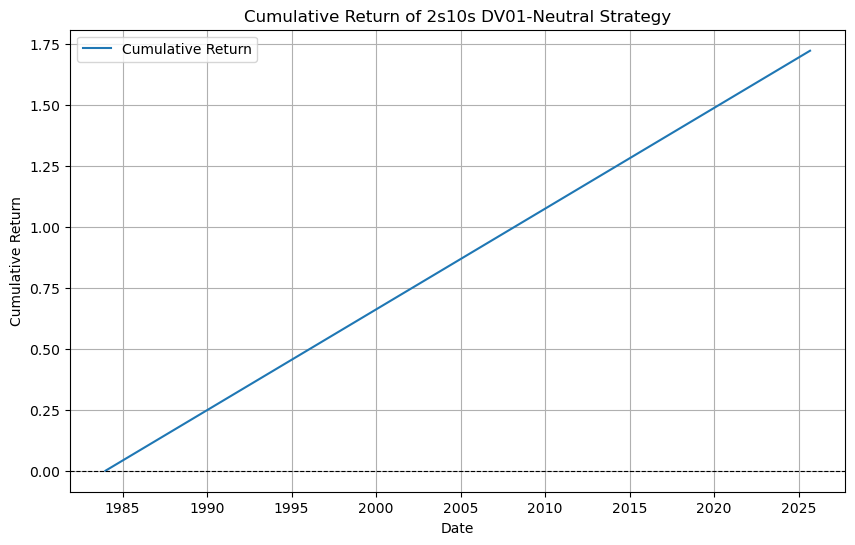

In [27]:
import matplotlib.pyplot as plt

res["CumulativeReturn"] = res["Equity"] / res["Equity"].iloc[0] - 1

plt.figure(figsize=(10,6))
plt.plot(res.index, res["CumulativeReturn"], label="Cumulative Return")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Cumulative Return of 2s10s DV01-Neutral Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
def get_yield_percent(row, T):
    """
    Return the forward rate (in percent) from the GSW dataset.
    Uses SVENF02 for 2y, SVENF10 for 10y.
    """
    if int(round(T)) == 2:
        return row["SVENF02"]
    elif int(round(T)) == 10:
        return row["SVENF10"]
    else:
        raise ValueError(f"No forward rate column for maturity {T}")

y2  = get_yield_percent(row, T2) / 100.0
y10 = get_yield_percent(row, T10) / 100.0

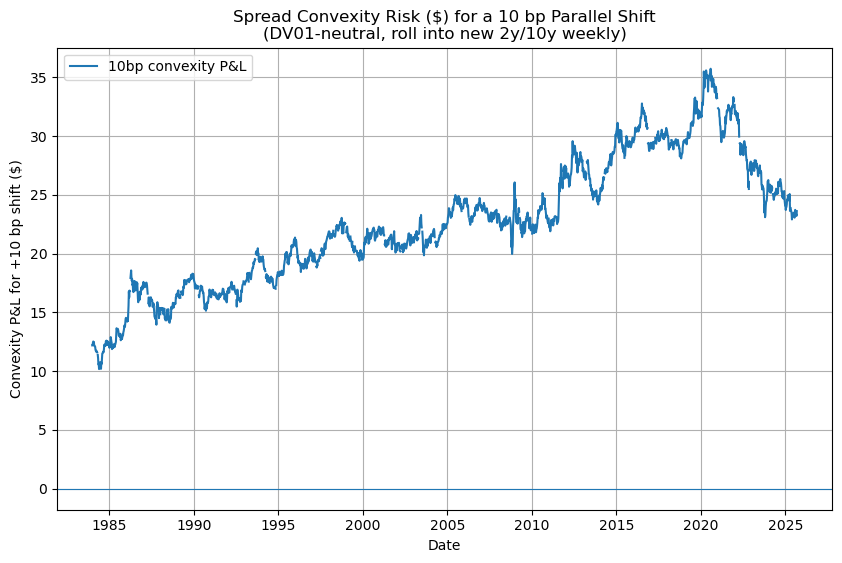

                  y2       y10            N2        N10        PortPV  \
Date                                                                    
1983-12-30  0.115048  0.118764 -1.919172e+06  1000000.0 -1.219760e+06   
1984-01-06  0.114490  0.118735 -1.917588e+06  1000000.0 -1.220114e+06   
1984-01-13  0.112553  0.116978 -1.944032e+06  1000000.0 -1.241741e+06   
1984-01-20  0.112999  0.116094 -1.963043e+06  1000000.0 -1.252767e+06   
1984-01-27  0.112597  0.116403 -1.955414e+06  1000000.0 -1.248901e+06   

            Convexity_dollars  Convexity_PnL_10bp_$  
Date                                                 
1983-12-30       2.439546e+07             12.197729  
1984-01-06       2.440253e+07             12.201267  
1984-01-13       2.483507e+07             12.417537  
1984-01-20       2.505559e+07             12.527795  
1984-01-27       2.497829e+07             12.489144  
                  y2       y10            N2        N10        PortPV  \
Date                                 

In [31]:
df = df.copy()

if isinstance(df.index, pd.PeriodIndex):
    df.index = df.index.to_timestamp()
elif not isinstance(df.index, pd.DatetimeIndex):
    # if you have a Date column instead of a datetime index:
    if "Date" in df.columns and not isinstance(df["Date"].dtype, pd.DatetimeTZDtype):
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
        df = df.set_index("Date")
    else:
        df.index = pd.to_datetime(df.index, errors="coerce")

df = df[~df.index.isna()].sort_index()

# 2) Define start/end as Timestamps
start = pd.Timestamp("1983-12-30")
end   = pd.Timestamp("2025-09-05")

# 3) Build the weekly schedule from your actual data (avoids int↔timestamp compares)
#    Use available rows only, taking the last obs each W-FRI.
dates = (
    df.loc[start:end]
      .resample("W-FRI")
      .last()
      .index
)

# If you also want to include the initial start date exactly (when present):
if start in df.index and (len(dates) == 0 or dates[0] != start):
    dates = pd.Index([start]).append(dates)

delta = 10/10000.0              # 10 bp in decimal yield
T2, T10 = 2.0, 10.0             # we roll into new 2y/10y each week (per assignment)
face_10y = 1_000_000.0          # "$1mm (in terms of face value) position in the 10 yr Treasury"

rows = []

for d in dates:
    row = df.loc[d]

    # current yields (decimals)
    y2  = get_yield_percent(row, T2)/100.0
    y10 = get_yield_percent(row, T10)/100.0

    # base prices per $1 face (your zero_price_cont already returns a price, keep consistent)
    P2_0  = zero_price_cont(y2,  T2)
    P10_0 = zero_price_cont(y10, T10)

    # DV01s in $ per 1 bp, per $1 face
    DV2   = dv01_zero(P2_0,  T2)
    DV10  = dv01_zero(P10_0, T10)

    # Notionals that make the spread DV01-neutral
    # If your prices are "per $100 face", replace face_10y with face_10y/100 accordingly,
    # and dv01_zero should match that convention.
    N10 = face_10y               # long 10s notionally $1mm face
    N2  = -N10 * (DV10 / DV2)    # short 2s to neutralize DV01

    # --- reprice the *legs* at y ± delta and build the *portfolio* prices ---
    def leg_price(y, T, N):
        return N * zero_price_cont(y, T)

    # Base portfolio PV (dollars)
    Port_0 = leg_price(y10, T10, N10) + leg_price(y2, T2, N2)

    # Up/down 10 bp parallel shift
    Port_up = leg_price(y10 + delta, T10, N10) + leg_price(y2 + delta, T2, N2)
    Port_dn = leg_price(y10 - delta, T10, N10) + leg_price(y2 - delta, T2, N2)

    # Central second difference gives P''(y) in *dollars* (this is P * C from the slides)
    second_deriv_dollars = (Port_up - 2.0*Port_0 + Port_dn) / (delta**2)

    # Convexity P&L for a +10 bp parallel move (since DV01 ≈ 0): 0.5 * P'' * (Δy)^2
    pnl_10bp = 0.5 * second_deriv_dollars * (delta**2)

    rows.append({
        "Date": d,
        "y2": y2, "y10": y10,
        "N2": N2, "N10": N10,
        "PortPV": Port_0,
        "Convexity_dollars": second_deriv_dollars,   # this equals P*C in $ units
        "Convexity_PnL_10bp_$": pnl_10bp
    })

conv = pd.DataFrame(rows).set_index("Date")

# --- plot the convexity P&L time series ---
plt.figure(figsize=(10,6))
plt.plot(conv.index, conv["Convexity_PnL_10bp_$"], label="10bp convexity P&L")
plt.axhline(0, linewidth=0.8)
plt.title("Spread Convexity Risk ($) for a 10 bp Parallel Shift\n(DV01-neutral, roll into new 2y/10y weekly)")
plt.xlabel("Date")
plt.ylabel("Convexity P&L for +10 bp shift ($)")
plt.grid(True)
plt.legend()
plt.show()

print(conv[["y2","y10","N2","N10","PortPV","Convexity_dollars","Convexity_PnL_10bp_$"]].head())
print(conv[["y2","y10","N2","N10","PortPV","Convexity_dollars","Convexity_PnL_10bp_$"]].tail())

In [75]:
df = df.copy()
if not isinstance(df.index, pd.DatetimeIndex):
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
        df = df.set_index("Date")
    else:
        df.index = pd.to_datetime(df.index, errors="coerce")
df = df.sort_index()

# Coerce forward rates to numeric and forward-fill
for c in ["SVENF02","SVENF10"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

start = pd.Timestamp("1983-12-30")
end   = pd.Timestamp("2025-09-05")
weekly = pd.date_range(start, end, freq="W-FRI")

dfw = df.reindex(weekly)[["SVENF02","SVENF10"]].ffill()

# If you use a cash rate, ensure it exists and is numeric (else set to 0)
if "R_1w" in df.columns:
    dfw["R_1w"] = pd.to_numeric(df.reindex(weekly)["R_1w"], errors="coerce").ffill()
else:
    dfw["R_1w"] = 0.0

# Use THESE dates:
dates = dfw.index

print("Weekly rows:", len(dates), dates[0], "→", dates[-1])
print(dfw[["SVENF02","SVENF10","R_1w"]].head())
print(dfw[["SVENF02","SVENF10","R_1w"]].tail())

Weekly rows: 2176 1983-12-30 00:00:00 → 2025-09-05 00:00:00
            SVENF02  SVENF10  R_1w
1983-12-30  11.5048  11.8764   0.0
1984-01-06  11.4490  11.8735   0.0
1984-01-13  11.2553  11.6978   0.0
1984-01-20  11.2999  11.6094   0.0
1984-01-27  11.2597  11.6403   0.0
            SVENF02  SVENF10  R_1w
2025-08-08   3.5319   5.2766   0.0
2025-08-15   3.5421   5.4097   0.0
2025-08-22   3.4416   5.3618   0.0
2025-08-29   3.3721   5.4395   0.0
2025-09-05   3.2987   5.2646   0.0


In [76]:
res10 = run_strategy(dfw, dates, margin_rate=0.10)
res02 = run_strategy(dfw, dates, margin_rate=0.02)

print(type(res10), type(res02))              # should both be DataFrame
print(res10.index[0], res10.index[-1])       # should cover the full span (except last week)
print(res10.columns.tolist())

1983-12-30 00:00:00 0.16131329920531381
1984-01-06 00:00:00 0.054905133520371074
1984-01-13 00:00:00 -0.41287885524031165
1984-01-20 00:00:00 0.2226792576947627
1984-01-27 00:00:00 -0.08430085092769692
1984-02-03 00:00:00 0.2286129762987772
1984-02-10 00:00:00 -0.19419606311799048
1984-02-17 00:00:00 -0.0307355669578592
1984-02-24 00:00:00 -0.034522056838104095
1984-03-02 00:00:00 0.040482905555124904
1984-03-09 00:00:00 0.030158681136393
1984-03-16 00:00:00 -0.30950298265864296
1984-03-23 00:00:00 -0.35681667543099876
1984-03-30 00:00:00 0.2519483483122608
1984-04-06 00:00:00 -0.12632835813230764
1984-04-13 00:00:00 0.3256939335033012
1984-04-20 00:00:00 -0.4196013532063078
1984-04-27 00:00:00 -0.1247321839464769
1984-05-04 00:00:00 0.3180142432717057
1984-05-11 00:00:00 -0.04732202376496109
1984-05-18 00:00:00 0.31317110967958917
1984-05-25 00:00:00 0.5533352561692699
1984-06-01 00:00:00 -0.6758149476212245
1984-06-08 00:00:00 -0.3398984249296404
1984-06-15 00:00:00 -0.92932427515568

AttributeError: 'NoneType' object has no attribute 'index'

In [86]:
def y_nss_percent(row, T):
    β0, β1, β2, β3 = [float(row[c]) for c in ["BETA0","BETA1","BETA2","BETA3"]]
    τ1, τ2 = float(row["TAU1"]), float(row["TAU2"])
    x1 = T/τ1 if τ1 != 0 else 1e9
    x2 = T/τ2 if τ2 != 0 else 1e9
    L1 = (1 - np.exp(-x1)) / x1
    L2 = (1 - np.exp(-x2)) / x2
    term1 = β0
    term2 = β1 * (L1)
    term3 = β2 * (L1 - np.exp(-x1))
    term4 = β3 * (L2 - np.exp(-x2))
    return term1 + term2 + term3 + term4   # percent

In [87]:
WEEK = 1/52.0

def roll_down_leg_dollars(row, N, T):
    """Hold the *curve at row fixed*, move maturity T -> T - 1 week."""
    if T <= WEEK:
        return 0.0
    yT  = y_nss_percent(row, T)        / 100.0
    yTm = y_nss_percent(row, T - WEEK) / 100.0
    P_T  = np.exp(-yT  * T)
    P_Tm = np.exp(-yTm * (T - WEEK))
    return N * (P_Tm - P_T)

In [78]:
def run_strategy(dfw, dates, margin_rate=0.10, face_10y=1_000_000.0, delta_fd=10/10000.0):
    rows = []
    cash = 0.0

    for i, d in enumerate(dates[:-1]):  # need i+1, so stop at second-to-last
        row   = dfw.loc[d]
        row_n = dfw.loc[dates[i+1]]

        # yields (decimals) and changes
        y2  = get_yield_percent(row,   2)/100.0
        y10 = get_yield_percent(row,  10)/100.0
        y2n  = get_yield_percent(row_n,   2)/100.0
        y10n = get_yield_percent(row_n,  10)/100.0
        dy2, dy10 = y2n - y2, y10n - y10

        # prices & DV01s per $1 face
        P2, P10 = zero_price_cont(y2,2), zero_price_cont(y10,10)
        DV2, DV10 = dv01_zero(P2,2), dv01_zero(P10,10)

        # DV01-neutral sizing (long $1mm 10y)
        N10 = face_10y
        N2  = -N10 * (DV10/DV2)

        # start-of-week portfolio & margin
        port = N10*P10 + N2*P2
        long_val  = (N10>0)*N10*P10 + (N2>0)*N2*P2
        short_val = (N10<0)*(-N10)*P10 + (N2<0)*(-N2)*P2
        gross  = long_val + short_val
        margin = margin_rate * gross

        # components
        spread = N10*DV10*dy10 + N2*DV2*dy2
        P2pp, P10pp = leg_second_deriv(y2,2,delta_fd), leg_second_deriv(y10,10,delta_fd)
        convex = 0.5*( N10*P10pp*(dy10**2) + N2*P2pp*(dy2**2) )
        r_1w = (row["R_1w"] if "R_1w" in row else 0.0)/100.0
        time = cash * (r_1w/52.0)

        # reprice next week (roll into new 2y/10y)
        P2n, P10n = zero_price_cont(y2n,2), zero_price_cont(y10n,10)
        port_next = N10*P10n + N2*P2n
        long_val_n  = (N10>0)*N10*P10n + (N2>0)*N2*P2n
        short_val_n = (N10<0)*(-N10)*P10n + (N2<0)*(-N2)*P2n
        margin_n = margin_rate * (long_val_n + short_val_n)

        total    = (port_next - port) + time - (margin_n - margin)
        residual = total - (spread + convex + time)

        cash = cash + time - (margin_n - margin)

        rows.append({
            "Date": d, "Port": port, "Cash": cash, "Margin": margin,
            "Spread_$": spread, "Convexity_$": convex, "Time_$": time,
            "Total_$": total, "Residual_$": residual
        })

    out = pd.DataFrame(rows).set_index("Date").sort_index()

    start_equity = (out["Port"] + out["Cash"] + out["Margin"]).replace(0, np.nan)
    out["WeeklyRet_Total"]     = out["Total_$"]     / start_equity
    out["WeeklyRet_Spread"]    = out["Spread_$"]    / start_equity
    out["WeeklyRet_Convexity"] = out["Convexity_$"] / start_equity
    out["WeeklyRet_Time"]      = out["Time_$"]      / start_equity
    out["WeeklyRet_Residual"]  = out["Residual_$"]  / start_equity

    for c in ["WeeklyRet_Total","WeeklyRet_Spread","WeeklyRet_Convexity","WeeklyRet_Time","WeeklyRet_Residual"]:
        out["Cum_"+c[10:]] = (1.0 + out[c]).cumprod() - 1.0

    return out

In [79]:
res10 = run_strategy(dfw, dfw.index, margin_rate=0.10)
res02 = run_strategy(dfw, dfw.index, margin_rate=0.02)

print(type(res10), type(res02))          # should be DataFrame, DataFrame
print(res10.index[0], res10.index[-1])   # should span your range (except last week)
print(res10[["Cum_Total","Cum_Spread","Cum_Convexity"]].tail())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
1983-12-30 00:00:00 2025-08-29 00:00:00
            Cum_Total  Cum_Spread  Cum_Convexity
Date                                            
2025-08-01   0.011704   -0.000004      -0.055557
2025-08-08   0.014828   -0.000004      -0.055581
2025-08-15   0.016788   -0.000005      -0.055582
2025-08-22   0.021044   -0.000005      -0.055589
2025-08-29   0.018765   -0.000005      -0.055629


In [80]:
for i, d in enumerate(dates[:-1]):    # stop before the last date (needs i+1)
    row    = dfw.loc[d]
    row_n  = dfw.loc[dates[i+1]]

    # current yields
    y2  = get_yield_percent(row,   2)/100.0
    y10 = get_yield_percent(row,  10)/100.0

    # next week’s yields
    y2_n  = get_yield_percent(row_n,   2)/100.0
    y10_n = get_yield_percent(row_n,  10)/100.0

    # changes
    dy2  = y2_n  - y2
    dy10 = y10_n - y10

    # prices & DV01s at current date
    P2   = zero_price_cont(y2,  2)
    P10  = zero_price_cont(y10, 10)
    DV2  = dv01_zero(P2,  2)
    DV10 = dv01_zero(P10, 10)

    # DV01-neutral sizing
    N10 = 1_000_000.0
    N2  = -N10 * (DV10 / DV2)

    # Spread return in dollars
    spread_dol = N10*DV10*dy10 + N2*DV2*dy2
    print(d, spread_dol)

1983-12-30 00:00:00 0.16131329920531381
1984-01-06 00:00:00 0.054905133520371074
1984-01-13 00:00:00 -0.41287885524031165
1984-01-20 00:00:00 0.2226792576947627
1984-01-27 00:00:00 -0.08430085092769692
1984-02-03 00:00:00 0.2286129762987772
1984-02-10 00:00:00 -0.19419606311799048
1984-02-17 00:00:00 -0.0307355669578592
1984-02-24 00:00:00 -0.034522056838104095
1984-03-02 00:00:00 0.040482905555124904
1984-03-09 00:00:00 0.030158681136393
1984-03-16 00:00:00 -0.30950298265864296
1984-03-23 00:00:00 -0.35681667543099876
1984-03-30 00:00:00 0.2519483483122608
1984-04-06 00:00:00 -0.12632835813230764
1984-04-13 00:00:00 0.3256939335033012
1984-04-20 00:00:00 -0.4196013532063078
1984-04-27 00:00:00 -0.1247321839464769
1984-05-04 00:00:00 0.3180142432717057
1984-05-11 00:00:00 -0.04732202376496109
1984-05-18 00:00:00 0.31317110967958917
1984-05-25 00:00:00 0.5533352561692699
1984-06-01 00:00:00 -0.6758149476212245
1984-06-08 00:00:00 -0.3398984249296404
1984-06-15 00:00:00 -0.92932427515568

In [88]:
def leg_second_deriv(y_dec, T, delta=10/10000.0):
    """
    Central finite difference for d^2P/dy^2 of a zero-coupon bond.
    y_dec : yield (decimal, e.g. 0.03 for 3%)
    T     : maturity in years
    delta : yield bump in decimal units (default = 10bp = 0.001)
    Returns: second derivative of price wrt yield, in $ per 1 face per (yield)^2
    """
    P0  = zero_price_cont(y_dec, T)
    Pup = zero_price_cont(y_dec + delta, T)
    Pdn = zero_price_cont(y_dec - delta, T)
    return (Pup - 2*P0 + Pdn) / (delta**2)

for i, d in enumerate(dates[:-1]):    # up to second-to-last date
    row   = dfw.loc[d]
    row_n = dfw.loc[dates[i+1]]

    # current yields
    y2  = get_yield_percent(row, 2)/100.0
    y10 = get_yield_percent(row, 10)/100.0

    # next week's yields
    y2_n  = get_yield_percent(row_n, 2)/100.0
    y10_n = get_yield_percent(row_n, 10)/100.0

    # yield changes
    dy2  = y2_n - y2
    dy10 = y10_n - y10

    # prices & DV01s
    P2   = zero_price_cont(y2,  2)
    P10  = zero_price_cont(y10, 10)
    DV2  = dv01_zero(P2,  2)
    DV10 = dv01_zero(P10, 10)

    # sizing (DV01 neutral, $1mm long 10y)
    N10 = 1_000_000.0
    N2  = -N10 * (DV10 / DV2)

    # --- Spread return (DV01) ---
    spread_dol = N10*DV10*dy10 + N2*DV2*dy2

    # --- Convexity return (finite-diff second derivative) ---
    P2pp  = leg_second_deriv(y2,  2,  delta=10/10000.0)
    P10pp = leg_second_deriv(y10, 10, delta=10/10000.0)
    convex_dol = 0.5 * (N10*P10pp*(dy10**2) + N2*P2pp*(dy2**2))

    # --- Time (carry) return ---
    # r_1w = row.get("R_1w", 0.0) / 100.0    
    # cash = 0.0   
    # time_dol = cash * r_1w/52.0 #I think I did this wrong
    time_dol = roll_down_leg_dollars(row, N10, 10.0) + roll_down_leg_dollars(row, N2, 2.0)
    # --- Reprice portfolio next week (roll into NEW 2y,10y) ---
    P2_n  = zero_price_cont(y2_n,  2)
    P10_n = zero_price_cont(y10_n, 10)
    port_val_next = N10*P10_n + N2*P2_n

    # print results
    print(f"Date {d}: Spread={spread_dol:.2f}, Convexity={convex_dol:.2f}, "
          f"Time={time_dol:.2f}, PortValNext={port_val_next:.2f}")

KeyError: 'BETA0'

In [82]:
rows = []
cash = 0.0
margin_rate = 0.10
face_10y = 1_000_000.0
delta_fd = 10/10000.0

for i, d in enumerate(dates[:-1]):                       # stop at second-to-last date
    row    = dfw.loc[d]
    row_n  = dfw.loc[dates[i+1]]

    # yields (decimals)
    y2  = get_yield_percent(row, 2)/100.0
    y10 = get_yield_percent(row,10)/100.0
    y2_n  = get_yield_percent(row_n, 2)/100.0
    y10_n = get_yield_percent(row_n,10)/100.0

    dy2  = y2_n  - y2
    dy10 = y10_n - y10

    # prices & DV01s (per $1 face)
    P2   = zero_price_cont(y2,  2)
    P10  = zero_price_cont(y10, 10)
    DV2  = dv01_zero(P2,  2)
    DV10 = dv01_zero(P10, 10)

    # sizes (DV01-neutral, long $1mm 10y)
    N10 = face_10y
    N2  = -N10 * (DV10 / DV2)

    # portfolio PV and margin at start of week
    port_val = N10*P10 + N2*P2
    long_val  = (N10>0)*N10*P10 + (N2>0)*N2*P2
    short_val = (N10<0)*(-N10)*P10 + (N2<0)*(-N2)*P2
    gross  = long_val + short_val
    margin = margin_rate * gross

    # components
    spread_dol = N10*DV10*dy10 + N2*DV2*dy2

    P2pp  = leg_second_deriv(y2,  2,  delta=delta_fd)
    P10pp = leg_second_deriv(y10, 10, delta=delta_fd)
    convex_dol = 0.5*( N10*P10pp*(dy10**2) + N2*P2pp*(dy2**2) )

    r_1w = row.get("R_1w", 0.0)/100.0
    time_dol = cash * (r_1w/52.0)

    # reprice to next week (roll into new bonds again)
    P2_n  = zero_price_cont(y2_n,  2)
    P10_n = zero_price_cont(y10_n, 10)
    port_val_next = N10*P10_n + N2*P2_n

    long_val_n  = (N10>0)*N10*P10_n + (N2>0)*N2*P2_n
    short_val_n = (N10<0)*(-N10)*P10_n + (N2<0)*(-N2)*P2_n
    gross_n  = long_val_n + short_val_n
    margin_n = margin_rate * gross_n

    total_dol    = (port_val_next - port_val) + time_dol - (margin_n - margin)
    residual_dol = total_dol - (spread_dol + convex_dol + time_dol)

    # update cash for next iteration
    cash = cash + time_dol - (margin_n - margin)

    rows.append({
        "Date": d,
        "y2": y2, "y10": y10, "dy2": dy2, "dy10": dy10,
        "P2": P2, "P10": P10, "DV2": DV2, "DV10": DV10,
        "N2": N2, "N10": N10,
        "Port": port_val, "Cash": cash, "Gross": gross, "Margin": margin,
        "Spread_$": spread_dol,
        "Convexity_$": convex_dol,
        "Time_$": time_dol,
        "Total_$": total_dol,
        "Residual_$": residual_dol
    })

# ---- build the results frame (no NaNs now) ----
out = pd.DataFrame(rows).set_index("Date").sort_index()

start_equity = out["Port"] + out["Cash"] + out["Margin"]
# guard against divide-by-zero creating NaNs:
start_equity = start_equity.replace(0, np.nan)

out["WeeklyRet_Total"]     = out["Total_$"]     / start_equity
out["WeeklyRet_Spread"]    = out["Spread_$"]    / start_equity
out["WeeklyRet_Convexity"] = out["Convexity_$"] / start_equity
out["WeeklyRet_Time"]      = out["Time_$"]      / start_equity
out["WeeklyRet_Residual"]  = out["Residual_$"]  / start_equity

for c in ["WeeklyRet_Total","WeeklyRet_Spread","WeeklyRet_Convexity","WeeklyRet_Time","WeeklyRet_Residual"]:
    out["Cum_" + c[10:]] = (1.0 + out[c]).cumprod() - 1.0

print(out[["dy2","dy10","Spread_$","Convexity_$","Time_$","Total_$","Residual_$",
           "WeeklyRet_Total","WeeklyRet_Spread","WeeklyRet_Convexity"]].head())

                 dy2      dy10  Spread_$  Convexity_$  Time_$      Total_$  \
Date                                                                         
1983-12-30 -0.000558 -0.000029  0.161313    -0.936651     0.0 -1793.166084   
1984-01-06 -0.001937 -0.001757  0.054905    35.637712    -0.0 -1645.809020   
1984-01-13  0.000446 -0.000884 -0.412879    11.512169    -0.0  4003.087723   
1984-01-20 -0.000402  0.000309  0.222679     0.989075    -0.0 -2255.132004   
1984-01-27  0.000242 -0.000028 -0.084301    -0.170612    -0.0   909.634651   

             Residual_$  WeeklyRet_Total  WeeklyRet_Spread  \
Date                                                         
1983-12-30 -1792.390746         0.001729     -1.555614e-07   
1984-01-06 -1681.501637         0.001585     -5.287430e-08   
1984-01-13  3991.988433        -0.003787      3.906402e-07   
1984-01-20 -2256.343758         0.002115     -2.088277e-07   
1984-01-27   909.889564        -0.000856      7.930631e-08   

            Weekly

In [83]:
rows = []
cash = 0.0
margin_rate = 0.10
face_10y = 1_000_000.0
delta_fd = 10/10000.0

for i, d in enumerate(dates[:-1]):              # stop at second-to-last date
    row   = dfw.loc[d]
    row_n = dfw.loc[dates[i+1]]

    # yields (decimals)
    y2  = get_yield_percent(row, 2)/100.0
    y10 = get_yield_percent(row,10)/100.0
    y2n  = get_yield_percent(row_n, 2)/100.0
    y10n = get_yield_percent(row_n,10)/100.0
    dy2, dy10 = y2n - y2, y10n - y10

    # prices & DV01s per $1 face
    P2, P10 = zero_price_cont(y2,2), zero_price_cont(y10,10)
    DV2, DV10 = dv01_zero(P2,2), dv01_zero(P10,10)

    # DV01-neutral sizing (long $1mm 10y)
    N10 = face_10y
    N2  = -N10 * (DV10/DV2)

    # portfolio PV + margin at start of week
    port = N10*P10 + N2*P2
    long_val  = (N10>0)*N10*P10 + (N2>0)*N2*P2
    short_val = (N10<0)*(-N10)*P10 + (N2<0)*(-N2)*P2
    gross  = long_val + short_val
    margin = margin_rate * gross

    # components
    spread = N10*DV10*dy10 + N2*DV2*dy2

    P2pp  = leg_second_deriv(y2,  2,  delta=delta_fd)
    P10pp = leg_second_deriv(y10, 10, delta=delta_fd)
    convex = 0.5*( N10*P10pp*(dy10**2) + N2*P2pp*(dy2**2) )

    r_1w = row.get("R_1w", 0.0)/100.0   # put 0 if you don’t have a 1w rate
    time = cash * (r_1w/52.0)

    # reprice next week (roll into new 2y/10y)
    P2n, P10n = zero_price_cont(y2n,2), zero_price_cont(y10n,10)
    port_next = N10*P10n + N2*P2n

    long_val_n  = (N10>0)*N10*P10n + (N2>0)*N2*P2n
    short_val_n = (N10<0)*(-N10)*P10n + (N2<0)*(-N2)*P2n
    margin_n = margin_rate * (long_val_n + short_val_n)

    total    = (port_next - port) + time - (margin_n - margin)
    residual = total - (spread + convex + time)

    # update cash for next iteration
    cash = cash + time - (margin_n - margin)

    # append every field you will need later
    rows.append({
        "Date": d,
        "y2": y2, "y10": y10, "dy2": dy2, "dy10": dy10,
        "P2": P2, "P10": P10, "DV2": DV2, "DV10": DV10,
        "N2": N2, "N10": N10,
        "Port": port, "Cash": cash, "Margin": margin,
        "Spread_$": spread, "Convexity_$": convex,
        "Time_$": time, "Total_$": total, "Residual_$": residual
    })

out = pd.DataFrame(rows).set_index("Date").sort_index()

# weekly returns on start-of-week equity; guard against zero/NaN
start_equity = (out["Port"] + out["Cash"] + out["Margin"]).replace(0, np.nan)

out["WeeklyRet_Total"]     = out["Total_$"]     / start_equity
out["WeeklyRet_Spread"]    = out["Spread_$"]    / start_equity
out["WeeklyRet_Convexity"] = out["Convexity_$"] / start_equity
out["WeeklyRet_Time"]      = out["Time_$"]      / start_equity
out["WeeklyRet_Residual"]  = out["Residual_$"]  / start_equity

for c in ["WeeklyRet_Total","WeeklyRet_Spread","WeeklyRet_Convexity","WeeklyRet_Time","WeeklyRet_Residual"]:
    out["Cum_"+c[10:]] = (1.0 + out[c]).cumprod() - 1.0

print(out[["dy2","dy10","Spread_$","Convexity_$","Time_$","Total_$","Residual_$",
           "WeeklyRet_Total","WeeklyRet_Spread","WeeklyRet_Convexity"]].head())

                 dy2      dy10  Spread_$  Convexity_$  Time_$      Total_$  \
Date                                                                         
1983-12-30 -0.000558 -0.000029  0.161313    -0.936651     0.0 -1793.166084   
1984-01-06 -0.001937 -0.001757  0.054905    35.637712    -0.0 -1645.809020   
1984-01-13  0.000446 -0.000884 -0.412879    11.512169    -0.0  4003.087723   
1984-01-20 -0.000402  0.000309  0.222679     0.989075    -0.0 -2255.132004   
1984-01-27  0.000242 -0.000028 -0.084301    -0.170612    -0.0   909.634651   

             Residual_$  WeeklyRet_Total  WeeklyRet_Spread  \
Date                                                         
1983-12-30 -1792.390746         0.001729     -1.555614e-07   
1984-01-06 -1681.501637         0.001585     -5.287430e-08   
1984-01-13  3991.988433        -0.003787      3.906402e-07   
1984-01-20 -2256.343758         0.002115     -2.088277e-07   
1984-01-27   909.889564        -0.000856      7.930631e-08   

            Weekly

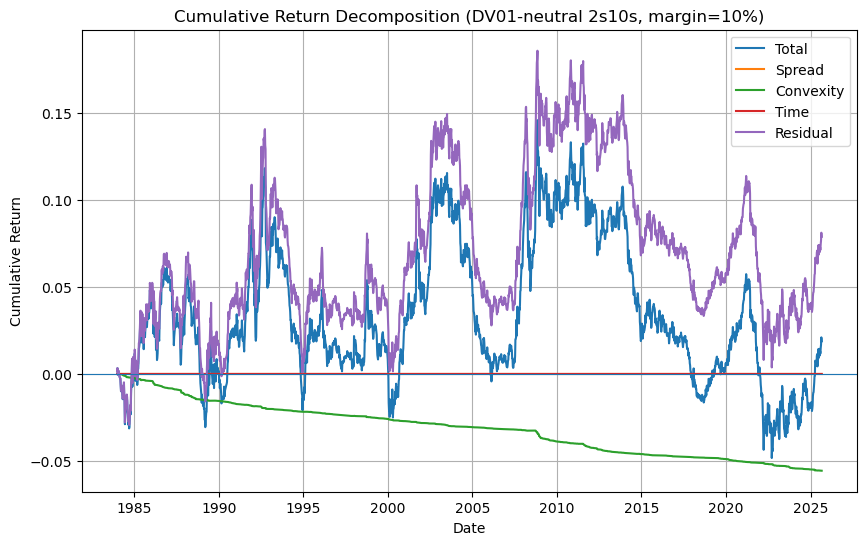

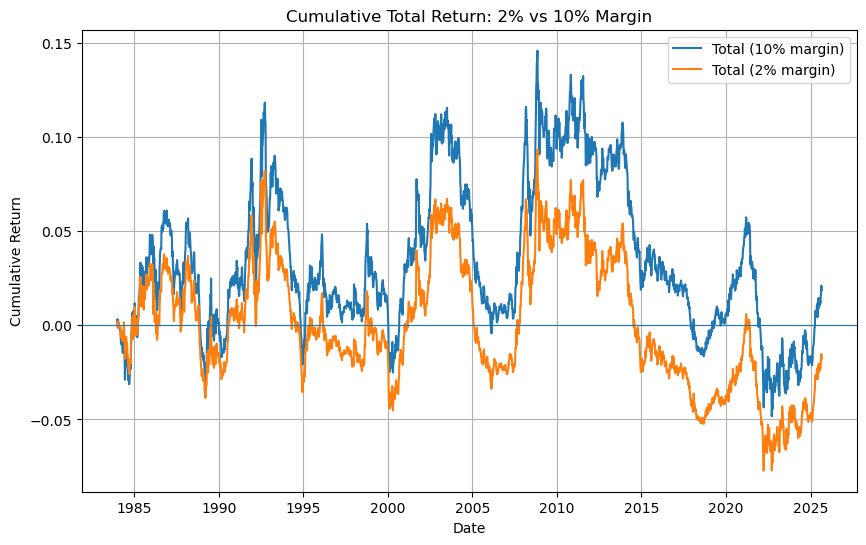

In [84]:
plt.figure(figsize=(10,6))
plt.plot(res10.index, res10["Cum_Total"],     label="Total")
plt.plot(res10.index, res10["Cum_Spread"],    label="Spread")
plt.plot(res10.index, res10["Cum_Convexity"], label="Convexity")
plt.plot(res10.index, res10["Cum_Time"],      label="Time")
plt.plot(res10.index, res10["Cum_Residual"],  label="Residual")
plt.axhline(0, linewidth=0.8)
plt.title("Cumulative Return Decomposition (DV01-neutral 2s10s, margin=10%)")
plt.xlabel("Date"); plt.ylabel("Cumulative Return"); plt.grid(True); plt.legend(); plt.show()

plt.figure(figsize=(10,6))
plt.plot(res10.index, res10["Cum_Total"], label="Total (10% margin)")
plt.plot(res02.index, res02["Cum_Total"], label="Total (2% margin)")
plt.axhline(0, linewidth=0.8)
plt.title("Cumulative Total Return: 2% vs 10% Margin")
plt.xlabel("Date"); plt.ylabel("Cumulative Return"); plt.grid(True); plt.legend(); plt.show()

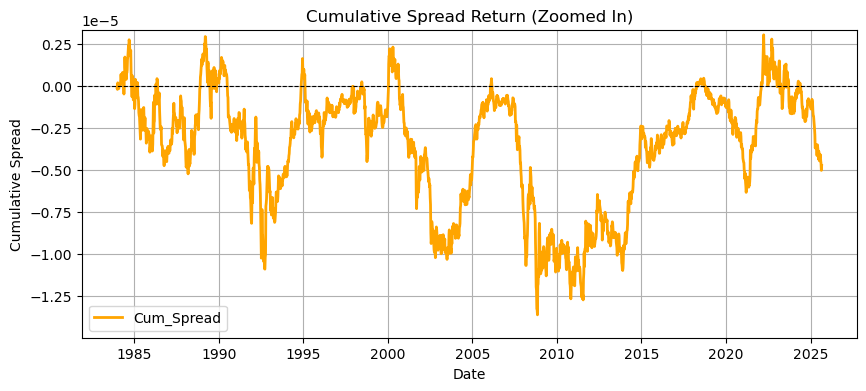

In [85]:
plt.figure(figsize=(10,4))
plt.plot(res10.index, res10["Cum_Spread"], label="Cum_Spread", color="orange", linewidth=2)

# Add zero line for reference
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

# Zoom the y-axis (adjust if you want more/less zoom)
plt.ylim(res10["Cum_Spread"].min()*1.1, res10["Cum_Spread"].max()*1.1)

plt.title("Cumulative Spread Return (Zoomed In)")
plt.xlabel("Date")
plt.ylabel("Cumulative Spread")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#fixing Cum Time